<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Week3/Linear_Regression/Introduction_to_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Please go through the module on Linear Regression before starting with this notebook.*

## Linear Regression Intuition
Before we dive into the actual technique of Linear Regression, lets look at some intuition of it.

Let’s say, I give you the following puzzle:

Given the following values of X and Y, what is the value of Y when X = 5.

(1,1), (2,2), (4,4), (100,100), (20, 20)

The answer is : 5. Not very difficult, right?

Now, let’s take a look at different example. Say you have the following pairs of X and Y. Can you calculate the value of Y, when X = 5?

(1,1), (2,4), (4,16), (100,10000), (20, 400)

The answer is : 25. Was it difficult?

Let’s understand a bit as to what happened in the above examples. 

When we look at the first example, after looking at the given pairs, one can establish that the relationship between X and Y is Y = X. 

Similarly, in the second example, the relationship is Y = X*X.

In these two examples, we can determine the relationship between two given variables (X and Y) because we could easily identify the relationship between them. Overall, machine learning works in the same way.

Your computer looks at some examples and then tries to identify “the most suitable” relationship between the sets X and Y. Using this identified relationship, it will try to predict (or more) for new examples for which you don’t know Y.

Keeping the above idea in mind, I will try to explain what is linear regression.

## Regression
Regression is usually termed as determining relationship(s) between two or more variables. 

For example, in the above two examples, X and Y are the variables. **X** is termed as the **independent variable** and **Y** is termed as the **dependent variable** (because its value is calculated using X).
Also, Y has a continous range (unlike classification where Y is discrete).


## Linear Regression/ Simple Linear Regression
Simple Linear Regression (SLR) is termed as simple because there is only independent variable.

Suppose we have a dataset which contains information about relationship between 'Years of experience' and 'Salary' in a particular work field.

The **dependent variable could represent salary**. You could assume that level of experience will impact salary. So, you would label the **independent variable as experience**.

Representing the experience with variable x and  salary with y, we can say that y ∝ x. ( y is proportional to x).

However, a change in x does not usually mean an equal change in y.

The **coefficient** can be thought of as a **multiplier that connects the independent and dependent variables.** It translates how much y will be affected by a unit change in x. 

Let's add a coefficient b1 to our example.

We thus get y = b1*x

Now the salaries in a particular job always start with the base amount or the lowest possible salary. We thus need to take that constant in consideration. 

The constant b0 would be the starting salary for someone with a zero level of experience. Assuming every fresher in the company gets 30K as starting salary we can set it as the base price.

Finally, we have:

Salary = b0 + b1* Experience

or

y = b0 + b1*x

This is similar to the equation of a straight line y= m*x +c

![Equation](https://miro.medium.com/max/1400/1*MgZkzHNM6lNTtrfhV6SRcA.png)

Let's bring our theory into practice now!

## Objective
The objective is to use linear regression to understand how years of experience impact Salary.

In [ ]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise

In [ ]:
#Loading the salary dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv')

In [ ]:
#Let's have a look at what our data is like
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Plotting the Data

Let’s plot our data points on a 2-D graph to eyeball our dataset(get a rough overview) and see if we can manually find any relationship between the data.

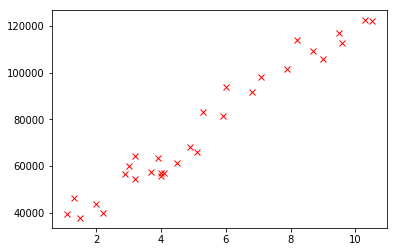

In [ ]:
# Scatter plot helps in visualising the data distribution
plt.plot(data.YearsExperience, data.Salary,'rx')

As you can see, there is a clear relationship between the years of experience and salary.

# Setting variables
Our next step is to divide the data into “attributes” and “labels” or as you've already known as input and target variables.

In our dataset, we only have two columns. We want to predict the Salary depending upon the Years of Experience recorded. Therefore our attribute set will consist of the “YearsExperience” column which is stored in the X variable, and the label will be the “Salary” column which is stored in y variable.

In [ ]:
X = data[['YearsExperience']]
y = data['Salary']

If you are wondering why a capital X is used for features, and lowercase y for labels, it is mainly due to convention.

# Splitting the data

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

In [ ]:
# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Understanding the working of Linear Regression

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that "best fits" the data points.It’s impossible to connect all the marks with a straight line, so you use a best fitting line. 

The equation for this line would be the result of your simple linear regression(Remember the equation y= b0 + b1*x that we just derived?). The regression finds the best fitting line.

Now, how do you find the best fitting line? Since our data points(values of x and y) will remain constant for a particular dataset, we can only alter b0 and b1.

**Our objective is to find the values of b0 and b1 that will best fit this data.**

These 2 variables/coefficients are actually called **hyperparameters**. In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. And we must always try to find some optimal parameters while building a machine learning model.

This line is your **regression model**.

To perform Linear Regression quickly, we will be using the library scikit-learn. If you don’t have it already you can install it using pip:


```
pip install scikit-learn 
```



# Training our model

After splitting the data into training and testing sets, finally, the time is to train our algorithm. Firstly, importing of sklearn.linear_model is required for us to access LinearRegression. It then needs to be instantiated and model fit to our training data. This is seen below.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Interpreting Coefficients
The coefficients(b0 and b1) will allow us to model our equation with values and find the best fit line. The linear_regressor variable (assigned to a LinearRegression object), is able to have the intercept and coefficients extracted, using the code below.

In [ ]:
# prints y-intercept
print(linear_regressor.intercept_)

# prints the coefficient
print(linear_regressor.coef_)

25789.060767971714
[9479.09167874]


The intercept will be your b0 value; and coefficient will be b1.

# Making predictions based on your model
Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the salaries. 

Making predictions based on your model is as simple as using the code below: passing the predict method your test data. This will return predicted values of y given the new test X data.

In [ ]:
y_pred = linear_regressor.predict(X_test)  # make predictions

We have our predictions in y_pred. Now lets visualize the data set and the regression line with the test data:

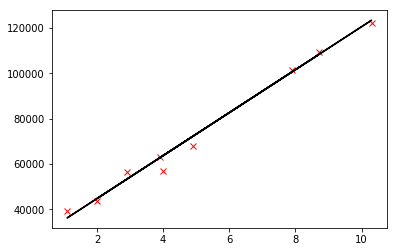

In [ ]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

As you can see, the algorithm has drawn a line that passes through the maximum test data points and has the minimum distance from the others. This line is known as the "best-fit" or the regression line. 

Since this line has a positive slope, we can say that the salary increases as no. of years of experience increase.

![Simple Linear Regression](https://i0.wp.com/brokerstir.com/wp-content/uploads/2018/03/simple_linear_2.png)

Using this line, you can even compute the salaries for the years of experience not present in the dataset by finding the corresponding value of y on the line.

![Prediction](https://miro.medium.com/max/1400/1*ANtsE4kMZDAqueFPVk1jmg.jpeg)

# Model Evaluation
There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2450.548521354496
9961725.246016478
3156.220088336122


We'll be discussing about each of these metrics/performance parameters in detail soon.


Congratulations! You've successfully completed your objective and created your own Linear Regression model.